# LBWA

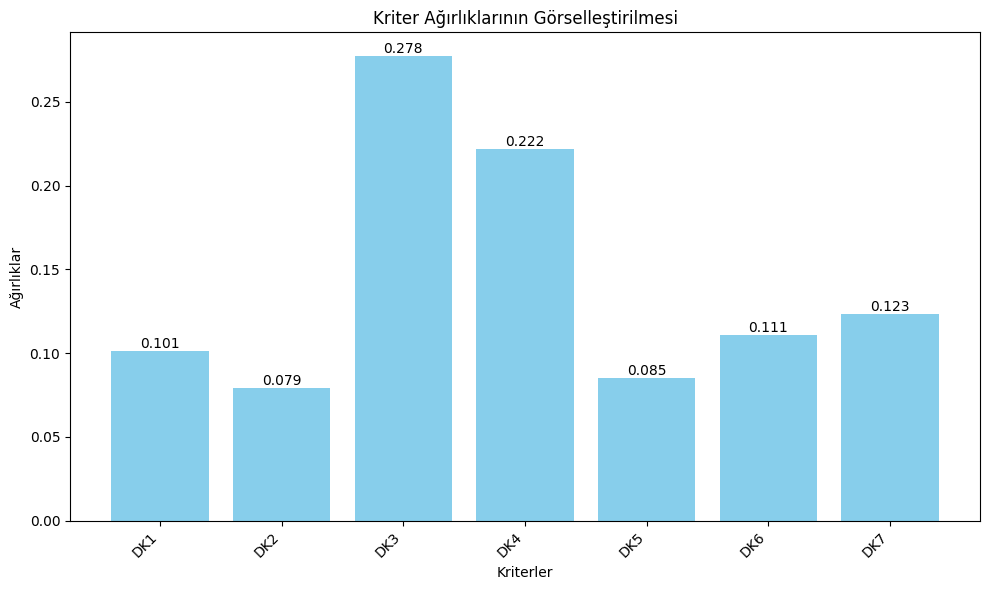


Ağırlık Vektörü: [0.10096838 0.0793323  0.27766306 0.22213045 0.08543479 0.11106522
 0.1234058 ]


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Kıstaslar ve düzeyler
criteria = ["DK1", "DK2", "DK3", "DK4", "DK5", "DK6", "DK7"]
levels = {
    "S1": {"criteria": ["DK3", "DK4"], "r": 1},
    "S2": {"criteria": ["DK7", "DK6", "DK1"], "r": 2},
    "S3": {"criteria": ["DK5", "DK2"], "r": 3},
}

r0 = 4
impact_values = {
    "DK7": 1,  "DK3": 0, "DK4": 1, "DK5": 1, "DK1": 3, "DK6": 2, "DK2": 2
}

# Etki fonksiyonlarını hesaplama
def calculate_impact(r0, r, impact):
    return 4 / (r0 * r + impact)

impact_functions = {}
for level, details in levels.items():
    r = details["r"]
    for crit in details["criteria"]:
        # Eğer kriter birden fazla seviyede varsa, etkileri topluyoruz
        if crit in impact_functions:
            impact_functions[crit] += calculate_impact(r0, r, impact_values[crit])
        else:
            impact_functions[crit] = calculate_impact(r0, r, impact_values[crit])

# Toplam etki fonksiyonları
total_impact = sum(impact_functions.values())

# Ağırlıkları hesaplama
weights = {key: impact / total_impact for key, impact in impact_functions.items()}

# Görselleştirme
criteria_labels = [crit for crit in criteria]
weight_values = [weights.get(crit, 0) for crit in criteria]

plt.figure(figsize=(10, 6))
bars = plt.bar(criteria_labels, weight_values, color='skyblue')
plt.xlabel("Kriterler")
plt.ylabel("Ağırlıklar")
plt.title("Kriter Ağırlıklarının Görselleştirilmesi")
plt.xticks(rotation=45, ha="right")

# Her çubuğun üzerine ağırlık değerini yazdırma
for bar, weight in zip(bars, weight_values):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(weight, 3), va='bottom', ha='center')

plt.tight_layout()
plt.show()

# Ağırlık vektörü
weight_vector = np.array([weights.get(crit, 0) for crit in criteria])
print("\nAğırlık Vektörü:", weight_vector)


# COPRAS

In [2]:
import numpy as np
import pandas as pd

# Karar Matrisi
decision_matrix = np.array([
    [139.7917094, 108.4083953, 81.55662191, 123.6285227, 137.0845152, 146.7452086, 73.77935838],
    [75.04010797, 130.3818008, 146.3540939, 125.5737837, 54.5494432, 79.91191346, 132.8032985],
    [117.266873, 100.7672749, 136.2496174, 141.7127605, 67.54984431, 113.2930796, 57.09997883],
    [101.5826069, 50.17643121, 95.14870407, 66.65643765, 60.46209245, 132.1969083, 115.4691042],
    [136.1035382, 130.4246325, 115.9992504, 78.94993599, 64.36337545, 103.0109688, 63.79867637],
    [134.5645686, 100.8854194, 137.015706, 94.34819969, 147.569965, 77.15366083, 145.4536338],
    [58.02022878, 54.7170513, 128.831718, 133.5224337, 124.8587841, 134.5925623, 95.92379564],
    [150.6795224, 77.75836758, 131.4329414, 84.12441112, 128.0190629, 131.1081373, 127.0823579],
    [116.0420606, 146.4391554, 119.2879219, 63.27004083, 120.8097979, 59.38266732, 56.57443031],
    [147.7793783, 137.1946118, 88.82831045, 139.2043009, 114.7190974, 87.86969644, 78.36431597],
    [69.07353247, 99.59657849, 57.8667088, 50.03435692, 78.52628744, 81.16517198, 140.1863722],
    [118.1382679, 142.1080195, 143.3756654, 71.58138606, 59.74937893, 126.8110331, 101.9395072],
    [78.95009901, 149.4595229, 94.35652031, 56.98527229, 109.5206464, 116.2995664, 71.91573525],
    [77.79159051, 144.2966529, 141.3771465, 131.0521035, 60.75374512, 117.7226768, 132.2793402],
])

# Ağırlıklar
weights = np.array([0.101, 0.079, 0.278, 0.222, 0.085, 0.111, 0.123])  # Ağırlıklar

# Fayda ve Maliyet Kriterleri
benefit_criteria = [0, 3, 4, 5, 6]  # Fayda kriterleri
cost_criteria = [1, 2]              # Maliyet kriterleri

# Adım 1: Normalize Etme (Kolon Toplamları)
column_sums = decision_matrix.sum(axis=0)
normalized_matrix = decision_matrix / column_sums

# Adım 2: Ağırlıklarla Çarpma
weighted_normalized_matrix = normalized_matrix * weights

# Adım 3: Fayda ve Maliyet Toplamları
S_plus = weighted_normalized_matrix[:, benefit_criteria].sum(axis=1)    # S+i
S_minus = weighted_normalized_matrix[:, cost_criteria].sum(axis=1)      # S-i
S_min = np.min(S_minus)                                                # S-min

# Qi Hesaplama
# Her bir Qi = S+i / (S-i * Σ(S-min / S-i))
sum_S_minus = np.sum(S_minus)
Qi = S_plus / (S_minus * (S_min / S_minus))  # Qi hesaplama

# Pi Hesaplama
Q_max = Qi.max()
Pi = (Qi / Q_max) * 100  # Yüzdelik oran

# Adım 5: Sıralama (Pi değerine göre sıralama)
rankings = Pi.argsort()[::-1] + 1  # En yüksek Pi değeri 1 olacak şekilde sıralama yapılıyor

# Alternatif İsimleri
alternatives = [
    "Bitcoin", "Ethereum", "Tether", "Binance Coin", "Cardano", "Solana",
    "Ripple", "Dogecoin", "Litecoin", "Polkadot", "Avalanche", "Polygon", "Chainlink", "Uniswap"
]

# Adım 5: Sıralama (Pi değerine göre sıralama)
results_df = pd.DataFrame({
    "Coinler": alternatives,
    "S+i": S_plus.round(8),
    "S-i": S_minus.round(8),
    "S-min": S_min,
    "Qi": Qi.round(8),
    "Pi": Pi.round(8)
})

# Pi değerine göre tabloyu sıralama
results_df = results_df.sort_values(by="Pi", ascending=False).reset_index(drop=True)

# Sıralama sütununu 1'den itibaren doldurma
results_df["Sıralama"] = range(1, len(results_df) + 1)

print(results_df)

         Coinler       S+i       S-i     S-min        Qi          Pi  Sıralama
0        Bitcoin  0.055548  0.019461  0.014948  3.716193  100.000000         1
1       Polkadot  0.053258  0.022157  0.014948  3.562991   95.877452         2
2       Dogecoin  0.052802  0.026493  0.014948  3.532471   95.056173         3
3         Solana  0.052300  0.028614  0.014948  3.498881   94.152276         4
4         Ripple  0.052011  0.024889  0.014948  3.479523   93.631386         5
5        Uniswap  0.050788  0.031545  0.014948  3.397710   91.429858         6
6         Tether  0.048618  0.028477  0.014948  3.252522   87.522952         7
7       Ethereum  0.046576  0.031701  0.014948  3.115944   83.847730         8
8        Polygon  0.041690  0.031778  0.014948  2.789039   75.050974         9
9   Binance Coin  0.041424  0.018872  0.014948  2.771253   74.572352        10
10       Cardano  0.039259  0.026486  0.014948  2.626421   70.675046        11
11     Chainlink  0.036464  0.023723  0.014948  2.43

         Coinler       S+i       S-i     S-min        Qi          Pi  Sıralama
0        Bitcoin  0.055548  0.019461  0.014948  3.716193  100.000000         1
1       Polkadot  0.053258  0.022157  0.014948  3.562991   95.877452         2
2       Dogecoin  0.052802  0.026493  0.014948  3.532471   95.056173         3
3         Solana  0.052300  0.028614  0.014948  3.498881   94.152276         4
4         Ripple  0.052011  0.024889  0.014948  3.479523   93.631386         5
5        Uniswap  0.050788  0.031545  0.014948  3.397710   91.429858         6
6         Tether  0.048618  0.028477  0.014948  3.252522   87.522952         7
7       Ethereum  0.046576  0.031701  0.014948  3.115944   83.847730         8
8        Polygon  0.041690  0.031778  0.014948  2.789039   75.050974         9
9   Binance Coin  0.041424  0.018872  0.014948  2.771253   74.572352        10
10       Cardano  0.039259  0.026486  0.014948  2.626421   70.675046        11
11     Chainlink  0.036464  0.023723  0.014948  2.43

<ipython-input-3-7af648cb095b>:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df["Pi"], y=results_df["Coinler"], palette="viridis")


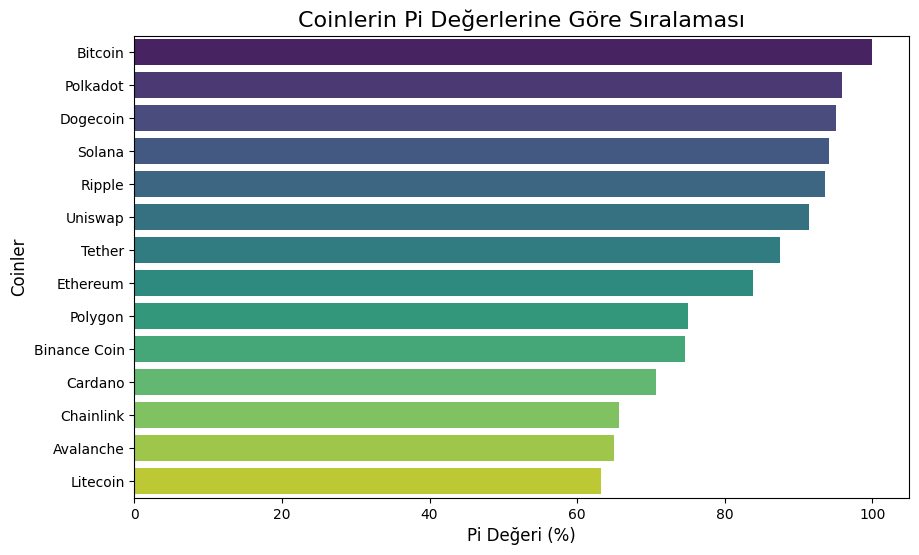

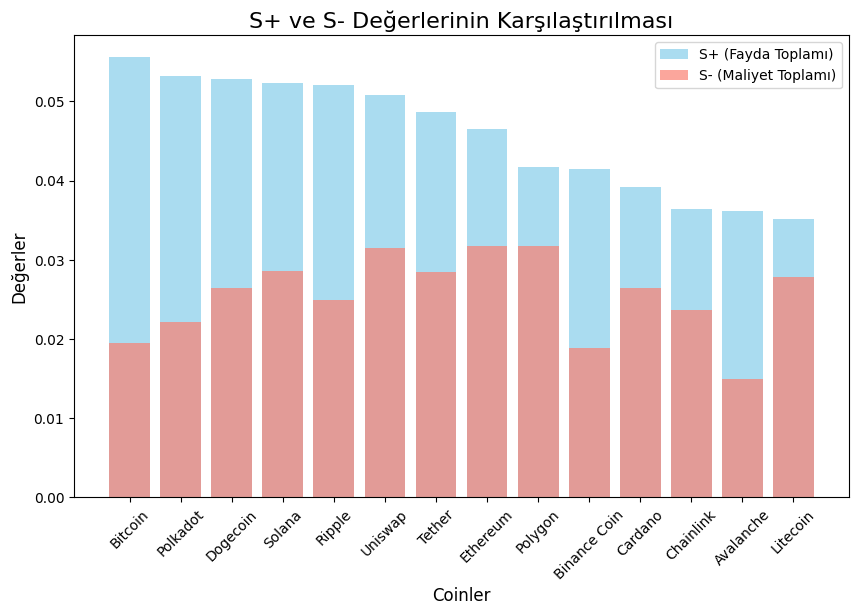

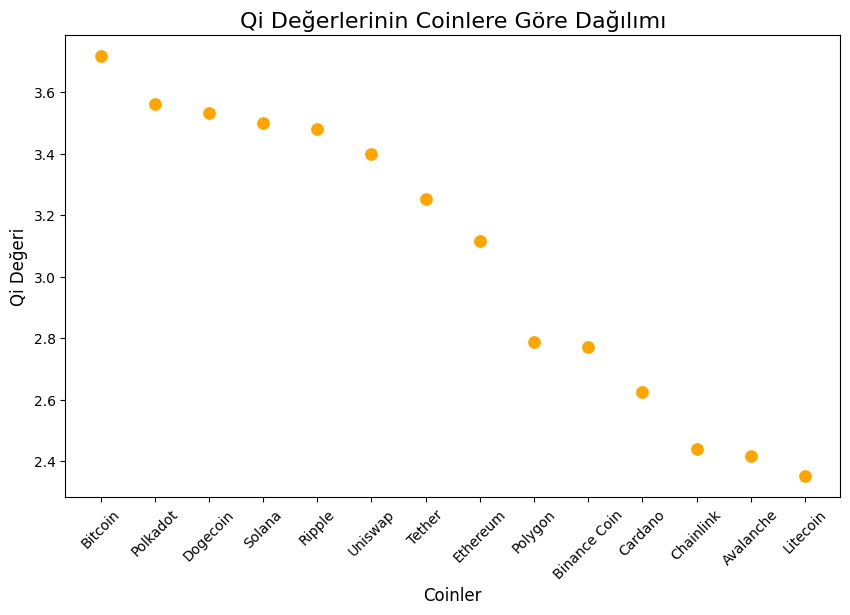

<ipython-input-3-7af648cb095b>:98: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df["Coinler"], y=results_df["S+i"], ax=ax[0, 0], palette="Blues")
<ipython-input-3-7af648cb095b>:103: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df["Coinler"], y=results_df["S-i"], ax=ax[0, 1], palette="Reds")
<ipython-input-3-7af648cb095b>:107: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df["Coinler"], y=results_df["Qi"], ax=ax[1, 0], palette="Oranges")
<ipython-input-3-7af648cb095b>:112: FutureWarning: 

Passing `palette` wit

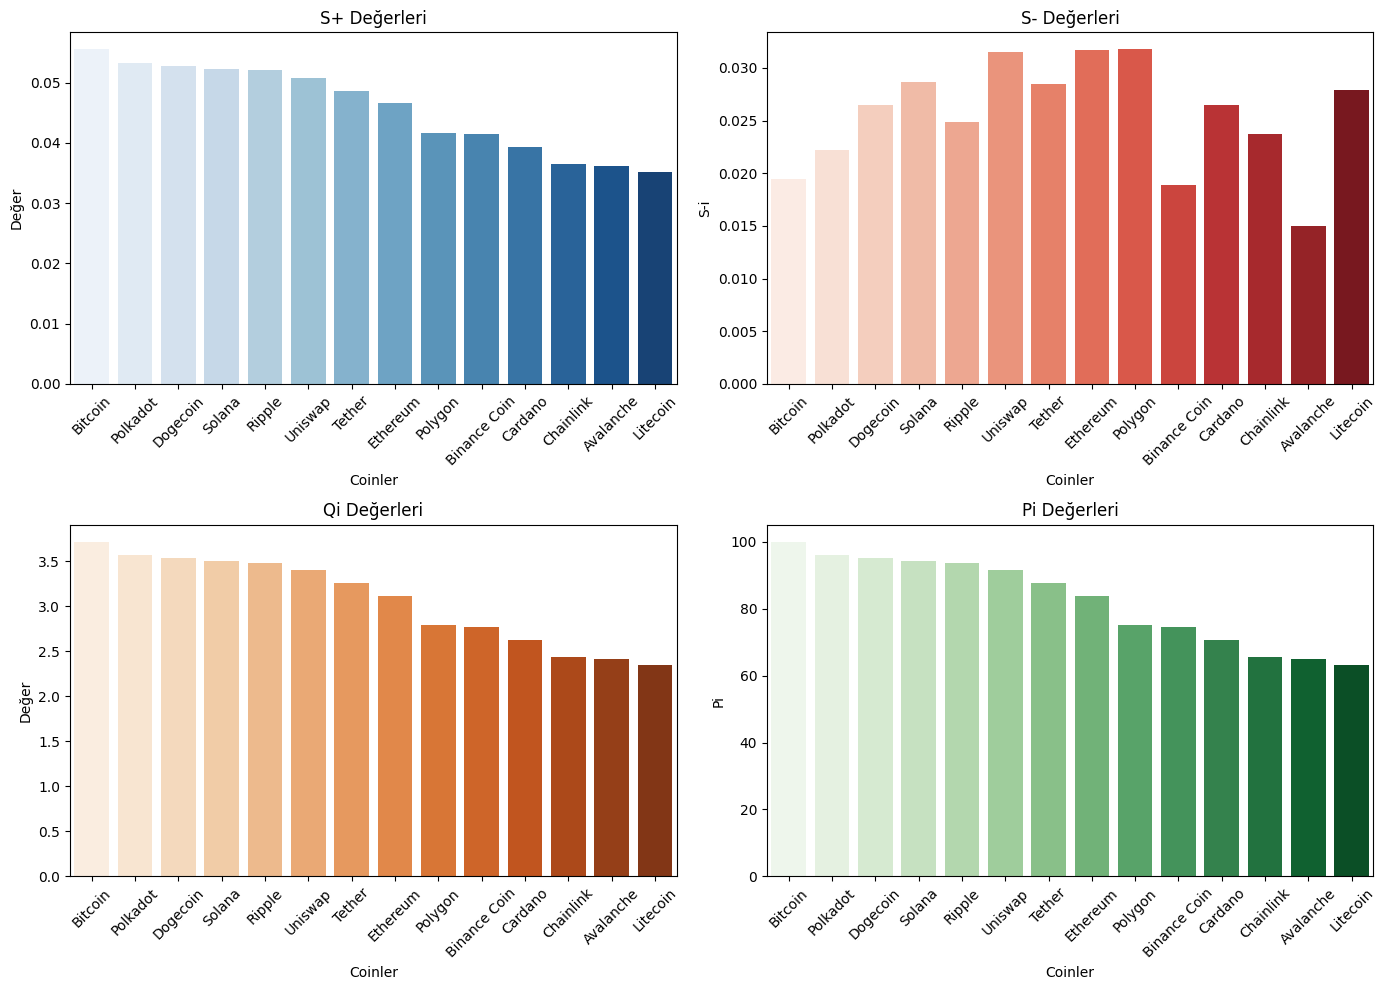

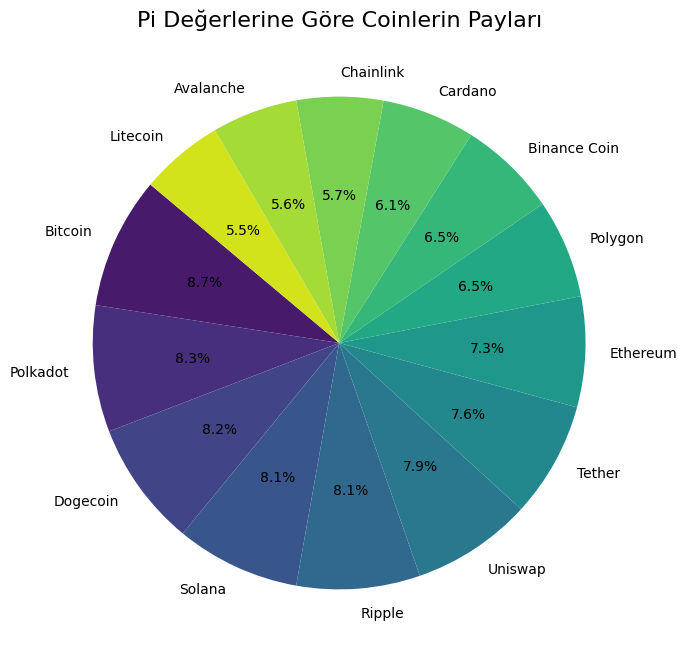

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Karar Matrisi
decision_matrix = np.array([
    [139.7917094, 108.4083953, 81.55662191, 123.6285227, 137.0845152, 146.7452086, 73.77935838],
    [75.04010797, 130.3818008, 146.3540939, 125.5737837, 54.5494432, 79.91191346, 132.8032985],
    [117.266873, 100.7672749, 136.2496174, 141.7127605, 67.54984431, 113.2930796, 57.09997883],
    [101.5826069, 50.17643121, 95.14870407, 66.65643765, 60.46209245, 132.1969083, 115.4691042],
    [136.1035382, 130.4246325, 115.9992504, 78.94993599, 64.36337545, 103.0109688, 63.79867637],
    [134.5645686, 100.8854194, 137.015706, 94.34819969, 147.569965, 77.15366083, 145.4536338],
    [58.02022878, 54.7170513, 128.831718, 133.5224337, 124.8587841, 134.5925623, 95.92379564],
    [150.6795224, 77.75836758, 131.4329414, 84.12441112, 128.0190629, 131.1081373, 127.0823579],
    [116.0420606, 146.4391554, 119.2879219, 63.27004083, 120.8097979, 59.38266732, 56.57443031],
    [147.7793783, 137.1946118, 88.82831045, 139.2043009, 114.7190974, 87.86969644, 78.36431597],
    [69.07353247, 99.59657849, 57.8667088, 50.03435692, 78.52628744, 81.16517198, 140.1863722],
    [118.1382679, 142.1080195, 143.3756654, 71.58138606, 59.74937893, 126.8110331, 101.9395072],
    [78.95009901, 149.4595229, 94.35652031, 56.98527229, 109.5206464, 116.2995664, 71.91573525],
    [77.79159051, 144.2966529, 141.3771465, 131.0521035, 60.75374512, 117.7226768, 132.2793402],
])

# Ağırlıklar
weights = np.array([0.101, 0.079, 0.278, 0.222, 0.085, 0.111, 0.123])  # Ağırlıklar

# Fayda ve Maliyet Kriterleri
benefit_criteria = [0, 3, 4, 5, 6]  # Fayda kriterleri
cost_criteria = [1, 2]              # Maliyet kriterleri

# Adım 1: Normalize Etme (Kolon Toplamları)
column_sums = decision_matrix.sum(axis=0)
normalized_matrix = decision_matrix / column_sums

# Adım 2: Ağırlıklarla Çarpma
weighted_normalized_matrix = normalized_matrix * weights

# Adım 3: Fayda ve Maliyet Toplamları
S_plus = weighted_normalized_matrix[:, benefit_criteria].sum(axis=1)    # S+i
S_minus = weighted_normalized_matrix[:, cost_criteria].sum(axis=1)      # S-i
S_min = np.min(S_minus)                                                # S-min

# Qi Hesaplama
# Her bir Qi = S+i / (S-i * Σ(S-min / S-i))
sum_S_minus = np.sum(S_minus)
Qi = S_plus / (S_minus * (S_min / S_minus))  # Qi hesaplama

# Pi Hesaplama
Q_max = Qi.max()
Pi = (Qi / Q_max) * 100  # Yüzdelik oran

# Adım 5: Sıralama (Pi değerine göre sıralama)
results_df = pd.DataFrame({
    "Coinler": alternatives,
    "S+i": S_plus.round(8),
    "S-i": S_minus.round(8),
    "S-min": S_min,
    "Qi": Qi.round(8),
    "Pi": Pi.round(8)
})

# Pi değerine göre tabloyu sıralama
results_df = results_df.sort_values(by="Pi", ascending=False).reset_index(drop=True)

# Sıralama sütununu 1'den itibaren doldurma
results_df["Sıralama"] = range(1, len(results_df) + 1)
print(results_df)
# Grafik 1: Pi Değerlerine Göre Sıralama
plt.figure(figsize=(10, 6))
sns.barplot(x=results_df["Pi"], y=results_df["Coinler"], palette="viridis")
plt.title("Coinlerin Pi Değerlerine Göre Sıralaması", fontsize=16)
plt.xlabel("Pi Değeri (%)", fontsize=12)
plt.ylabel("Coinler", fontsize=12)
plt.show()

# Grafik 2: S+ ve S- Değerlerinin Karşılaştırması
plt.figure(figsize=(10, 6))
plt.bar(results_df["Coinler"], results_df["S+i"], label="S+ (Fayda Toplamı)", color="skyblue", alpha=0.7)
plt.bar(results_df["Coinler"], results_df["S-i"], label="S- (Maliyet Toplamı)", color="salmon", alpha=0.7)
plt.title("S+ ve S- Değerlerinin Karşılaştırılması", fontsize=16)
plt.xlabel("Coinler", fontsize=12)
plt.ylabel("Değerler", fontsize=12)
plt.legend()
plt.xticks(rotation=45)
plt.show()

# Grafik 3: Qi Değerleri Dağılımı
plt.figure(figsize=(10, 6))
sns.scatterplot(x=results_df["Coinler"], y=results_df["Qi"], color="orange", s=100)
plt.title("Qi Değerlerinin Coinlere Göre Dağılımı", fontsize=16)
plt.xlabel("Coinler", fontsize=12)
plt.ylabel("Qi Değeri", fontsize=12)
plt.xticks(rotation=45)
plt.show()

# Grafik 4: Çoklu Değerleri Görselleştirme
fig, ax = plt.subplots(2, 2, figsize=(14, 10))
sns.barplot(x=results_df["Coinler"], y=results_df["S+i"], ax=ax[0, 0], palette="Blues")
ax[0, 0].set_title("S+ Değerleri")
ax[0, 0].set_ylabel("Değer")
ax[0, 0].tick_params(axis='x', rotation=45)

sns.barplot(x=results_df["Coinler"], y=results_df["S-i"], ax=ax[0, 1], palette="Reds")
ax[0, 1].set_title("S- Değerleri")
ax[0, 1].tick_params(axis='x', rotation=45)

sns.barplot(x=results_df["Coinler"], y=results_df["Qi"], ax=ax[1, 0], palette="Oranges")
ax[1, 0].set_title("Qi Değerleri")
ax[1, 0].set_ylabel("Değer")
ax[1, 0].tick_params(axis='x', rotation=45)

sns.barplot(x=results_df["Coinler"], y=results_df["Pi"], ax=ax[1, 1], palette="Greens")
ax[1, 1].set_title("Pi Değerleri")
ax[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Grafik 5: Pasta Grafiği
plt.figure(figsize=(10, 8))
plt.pie(results_df["Pi"], labels=results_df["Coinler"], autopct='%1.1f%%', startangle=140, colors=sns.color_palette("viridis", len(results_df)))
plt.title("Pi Değerlerine Göre Coinlerin Payları", fontsize=16)
plt.show()

# DUYARLILIK ANALİZİ

In [4]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.2/57.2 MB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.4/320.4 kB 23.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 66.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 5.2 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


In [5]:
import gradio as gr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# LBWA Analizi Fonksiyonu
def lbwa_analysis(r0, impact_values):
    # Kullanıcıdan gelen değerleri işleme
    impact_values = list(map(int, impact_values.split(',')))
    criteria = ["DK1", "DK2", "DK3", "DK4", "DK5", "DK6", "DK7"]
    levels = {
        "S1": {"criteria": ["DK3", "DK4"], "r": 1},
        "S2": {"criteria": ["DK7", "DK6", "DK1"], "r": 2},
        "S3": {"criteria": ["DK5", "DK2"], "r": 3},
    }

    def calculate_impact(r0, r, impact):
        return 4 / (r0 * r + impact)

    impact_functions = {}
    for level, details in levels.items():
        r = details["r"]
        for crit in details["criteria"]:
            idx = criteria.index(crit)
            impact = impact_values[idx]
            if crit in impact_functions:
                impact_functions[crit] += calculate_impact(r0, r, impact)
            else:
                impact_functions[crit] = calculate_impact(r0, r, impact)

    total_impact = sum(impact_functions.values())
    weights = {key: impact / total_impact for key, impact in impact_functions.items()}
    return weights

# COPRAS Analizi Fonksiyonu
def copras_analysis(weights):
    weights = np.array(list(map(float, weights.split(','))))
    decision_matrix = np.array([
        [139.7917094, 108.4083953, 81.55662191, 123.6285227, 137.0845152, 146.7452086, 73.77935838],
        [75.04010797, 130.3818008, 146.3540939, 125.5737837, 54.5494432, 79.91191346, 132.8032985],
        [117.266873, 100.7672749, 136.2496174, 141.7127605, 67.54984431, 113.2930796, 57.09997883],
        [101.5826069, 50.17643121, 95.14870407, 66.65643765, 60.46209245, 132.1969083, 115.4691042],
        [136.1035382, 130.4246325, 115.9992504, 78.94993599, 64.36337545, 103.0109688, 63.79867637],
        [134.5645686, 100.8854194, 137.015706, 94.34819969, 147.569965, 77.15366083, 145.4536338],
        [58.02022878, 54.7170513, 128.831718, 133.5224337, 124.8587841, 134.5925623, 95.92379564],
        [150.6795224, 77.75836758, 131.4329414, 84.12441112, 128.0190629, 131.1081373, 127.0823579],
        [116.0420606, 146.4391554, 119.2879219, 63.27004083, 120.8097979, 59.38266732, 56.57443031],
        [147.7793783, 137.1946118, 88.82831045, 139.2043009, 114.7190974, 87.86969644, 78.36431597],
        [69.07353247, 99.59657849, 57.8667088, 50.03435692, 78.52628744, 81.16517198, 140.1863722],
        [118.1382679, 142.1080195, 143.3756654, 71.58138606, 59.74937893, 126.8110331, 101.9395072],
        [78.95009901, 149.4595229, 94.35652031, 56.98527229, 109.5206464, 116.2995664, 71.91573525],
        [77.79159051, 144.2966529, 141.3771465, 131.0521035, 60.75374512, 117.7226768, 132.2793402],
    ])

    column_sums = decision_matrix.sum(axis=0)
    normalized_matrix = decision_matrix / column_sums
    weighted_matrix = normalized_matrix * weights

    benefit_criteria = [0, 3, 4, 5, 6]
    cost_criteria = [1, 2]

    S_plus = weighted_matrix[:, benefit_criteria].sum(axis=1)
    S_minus = weighted_matrix[:, cost_criteria].sum(axis=1)
    S_min = np.min(S_minus)

    Qi = S_plus / (S_minus * (S_min / S_minus))
    Q_max = Qi.max()
    Pi = (Qi / Q_max) * 100

    alternatives = [
        "Bitcoin", "Ethereum", "Tether", "Binance Coin", "Cardano", "Solana",
        "Ripple", "Dogecoin", "Litecoin", "Polkadot", "Avalanche", "Polygon", "Chainlink", "Uniswap"
    ]

    results_df = pd.DataFrame({
        "Alternatifler": alternatives,
        "S+i": S_plus.round(8),
        "S-i": S_minus.round(8),
        "Qi": Qi.round(8),
        "Pi": Pi.round(8)
    }).sort_values(by="Pi", ascending=False).reset_index(drop=True)

    return results_df

# Gradio Fonksiyonu
def analyze_system(r0, impact_values, weights):
    lbwa_weights = lbwa_analysis(r0, impact_values)
    copras_results = copras_analysis(weights)
    return lbwa_weights, copras_results

# Gradio Arayüzü
iface = gr.Interface(
    fn=analyze_system,
    inputs=[
        gr.Number(label="LBWA r0 Değeri", value=4),
        gr.Textbox(label="LBWA Etki Değerleri (Virgülle Ayrılmış)", value="3,2,1,0,2,1,1"),
        gr.Textbox(label="COPRAS Ağırlıkları (Virgülle Ayrılmış)", value="0.101,0.079,0.278,0.222,0.085,0.111,0.123"),
    ],
    outputs=[
        gr.JSON(label="LBWA Sonuçları"),
        gr.DataFrame(label="COPRAS Sonuçları"),
    ],
    title="LBWA ve COPRAS Analiz Aracı",
    description="LBWA ve COPRAS analizlerini yaparak sonuçları görüntüleyin."
)

iface.launch()

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://c21cd8e64a56c80dfe.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
